# aSPEM Experiment : analysis




In [1]:
%run 0_parameters.ipynb


WELCOME



In [2]:
if not os.path.exists('figures/Result'):
    os.makedirs('figures/Result')

In [3]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = None #'AM'
mode = 'pari'

from aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, name_file_fit='fct_velocity_sigmo')

In [4]:
t_titre_f = t_titre
t_label_f = t_label
fig_width_f = fig_width/2

proba = 'real', 'bcp'

mode_bcp = 'fixed', 'max', 'expectation', 'mean', 'leaky'

result = 'bet', 'acceleration', 'velocity'


color_bcp_mean = 'g'
color_bcp_fix = 'tab:orange'
color_true_p = 'b'

In [5]:
opt = dict(t_titre=t_titre_f, t_label=t_label_f, titre='',
           color_r=[color_true_p, color_bcp_fix, color_bcp_mean], alpha=1)

real :
mean r : 0.6949282558089743 +/- 0.08616601718854244
mean MI : 0.9400985946400798 +/- 0.25505735898019954

leaky :
mean r : 0.7311944085629235 +/- 0.12986083560876127
mean MI : 1.1178437166011033 +/- 0.40929175360168124

mean :
mean r : 0.8134820212318102 +/- 0.09165037920053389
mean MI : 1.3126921676470396 +/- 0.36441827882578837

real leaky
r = WilcoxonResult(statistic=18.0, pvalue=0.09948088075636449)
mi = WilcoxonResult(statistic=12.0, pvalue=0.034170472692229406) 

real mean
r = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=5.0, pvalue=0.00764908205529392)
mi = WilcoxonResult(statistic=11.0, pvalue=0.0280561241492436) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


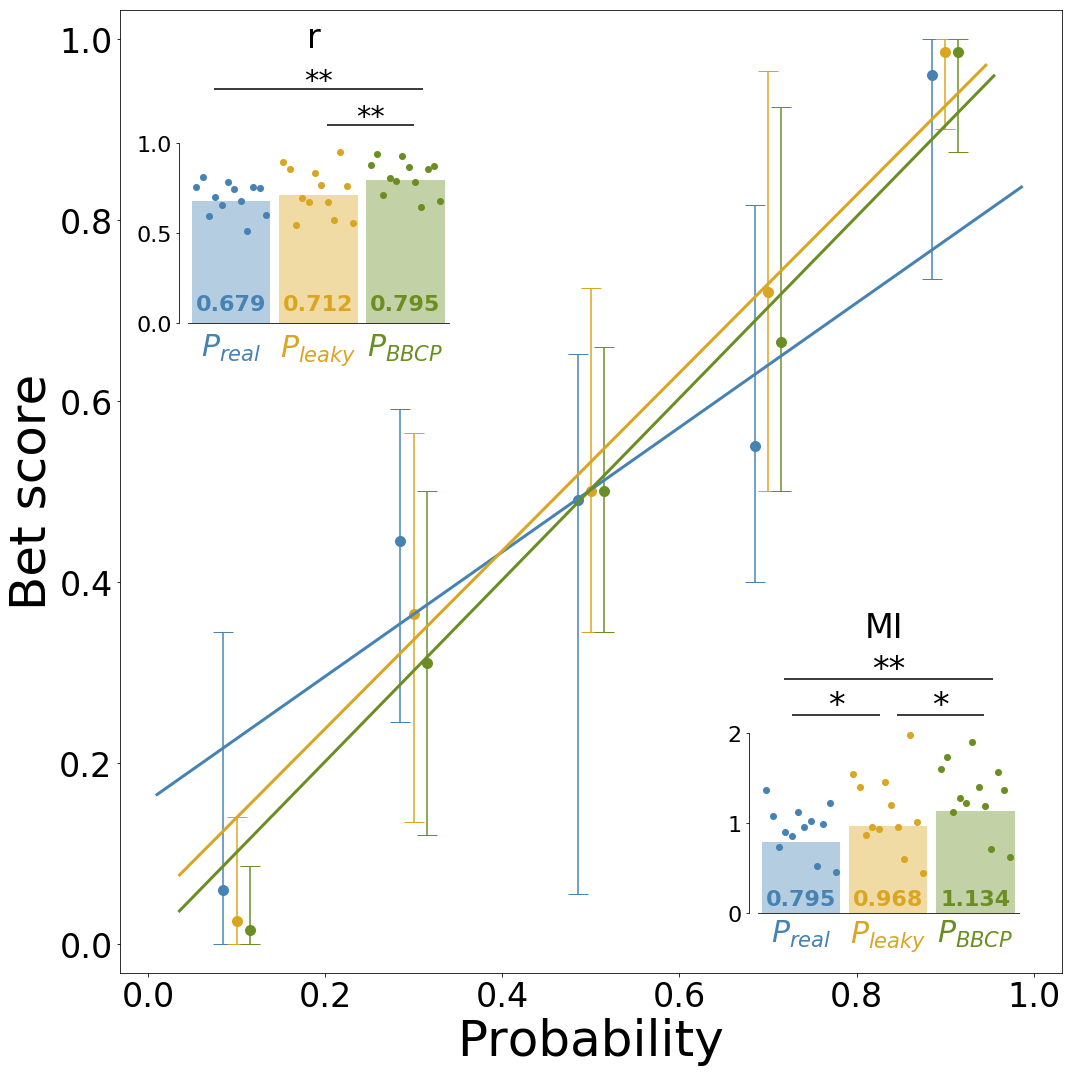

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='bet', offset=0.015, lw_r=3,   **opt)
for ext in exts: fig.savefig('{msfigpath}/4_B_result_psycho_bet'.format(msfigpath=msfigpath) + ext, dpi=dpi)

real :
mean r : 0.6138094371436249 +/- 0.0698833806126575
mean MI : 0.5622221741547854 +/- 0.10792628505105299

leaky :
mean r : 0.6005091596270464 +/- 0.07905865156821733
mean MI : 0.6221265879376084 +/- 0.10254728341683388

mean :
mean r : 0.6734378813597085 +/- 0.07975726457431757
mean MI : 0.7079482646555189 +/- 0.13419759067142

real leaky
r = WilcoxonResult(statistic=24.0, pvalue=0.23931654122149526)
mi = WilcoxonResult(statistic=5.0, pvalue=0.00764908205529392) 

real mean
r = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=2.0, pvalue=0.0037017494066892425)
mi = WilcoxonResult(statistic=3.0, pvalue=0.004741768038406972) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


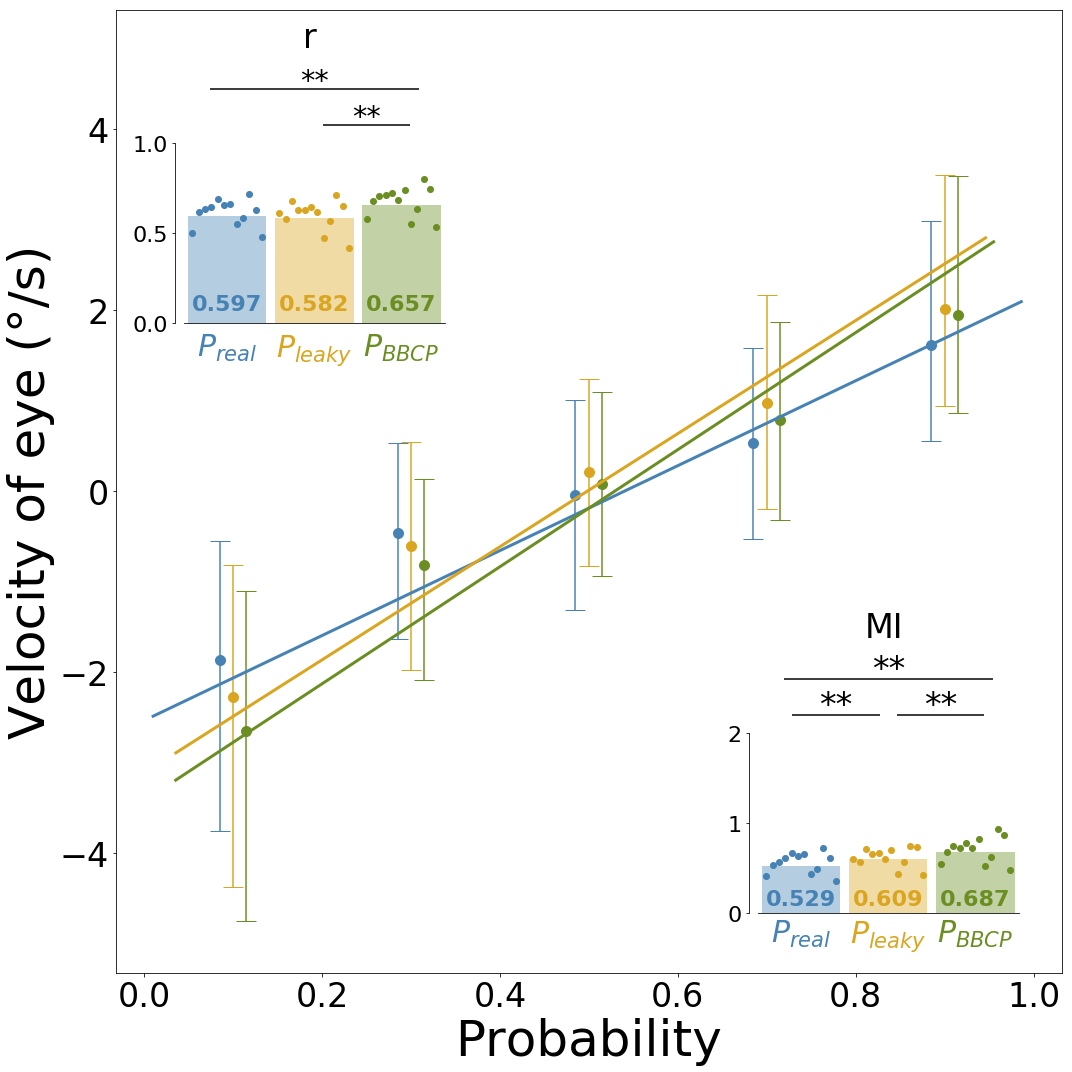

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='velocity', offset=0.015, lw_r=3, **opt)
for ext in exts: fig.savefig('{msfigpath}/4_A_result_psycho_aSPEM'.format(msfigpath=msfigpath) + ext, dpi=dpi)

## two representative subjects

In [8]:
N_trials = 200
num_block = 0
sujet = [0, 5]
figname = '2_results_enregistrement'

In [9]:
t_label_f = t_label
fig_width_f = fig_width

In [10]:
color=[['k', 'k'], [color_true_p, color_true_p], ['k','none']]
alpha = [[.35,.15],[.0,.0],[1,0]]
opt = dict(sujet=sujet, num_block=[num_block], TD=True, legends=True,
           color=color,alpha=alpha, titre='', t_label=t_label_f, lw=4,
           color_bet='firebrick', color_va='dimgrey', fig_width=fig_width_f) 

sujet 0 = AM
sujet 5 = IP


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


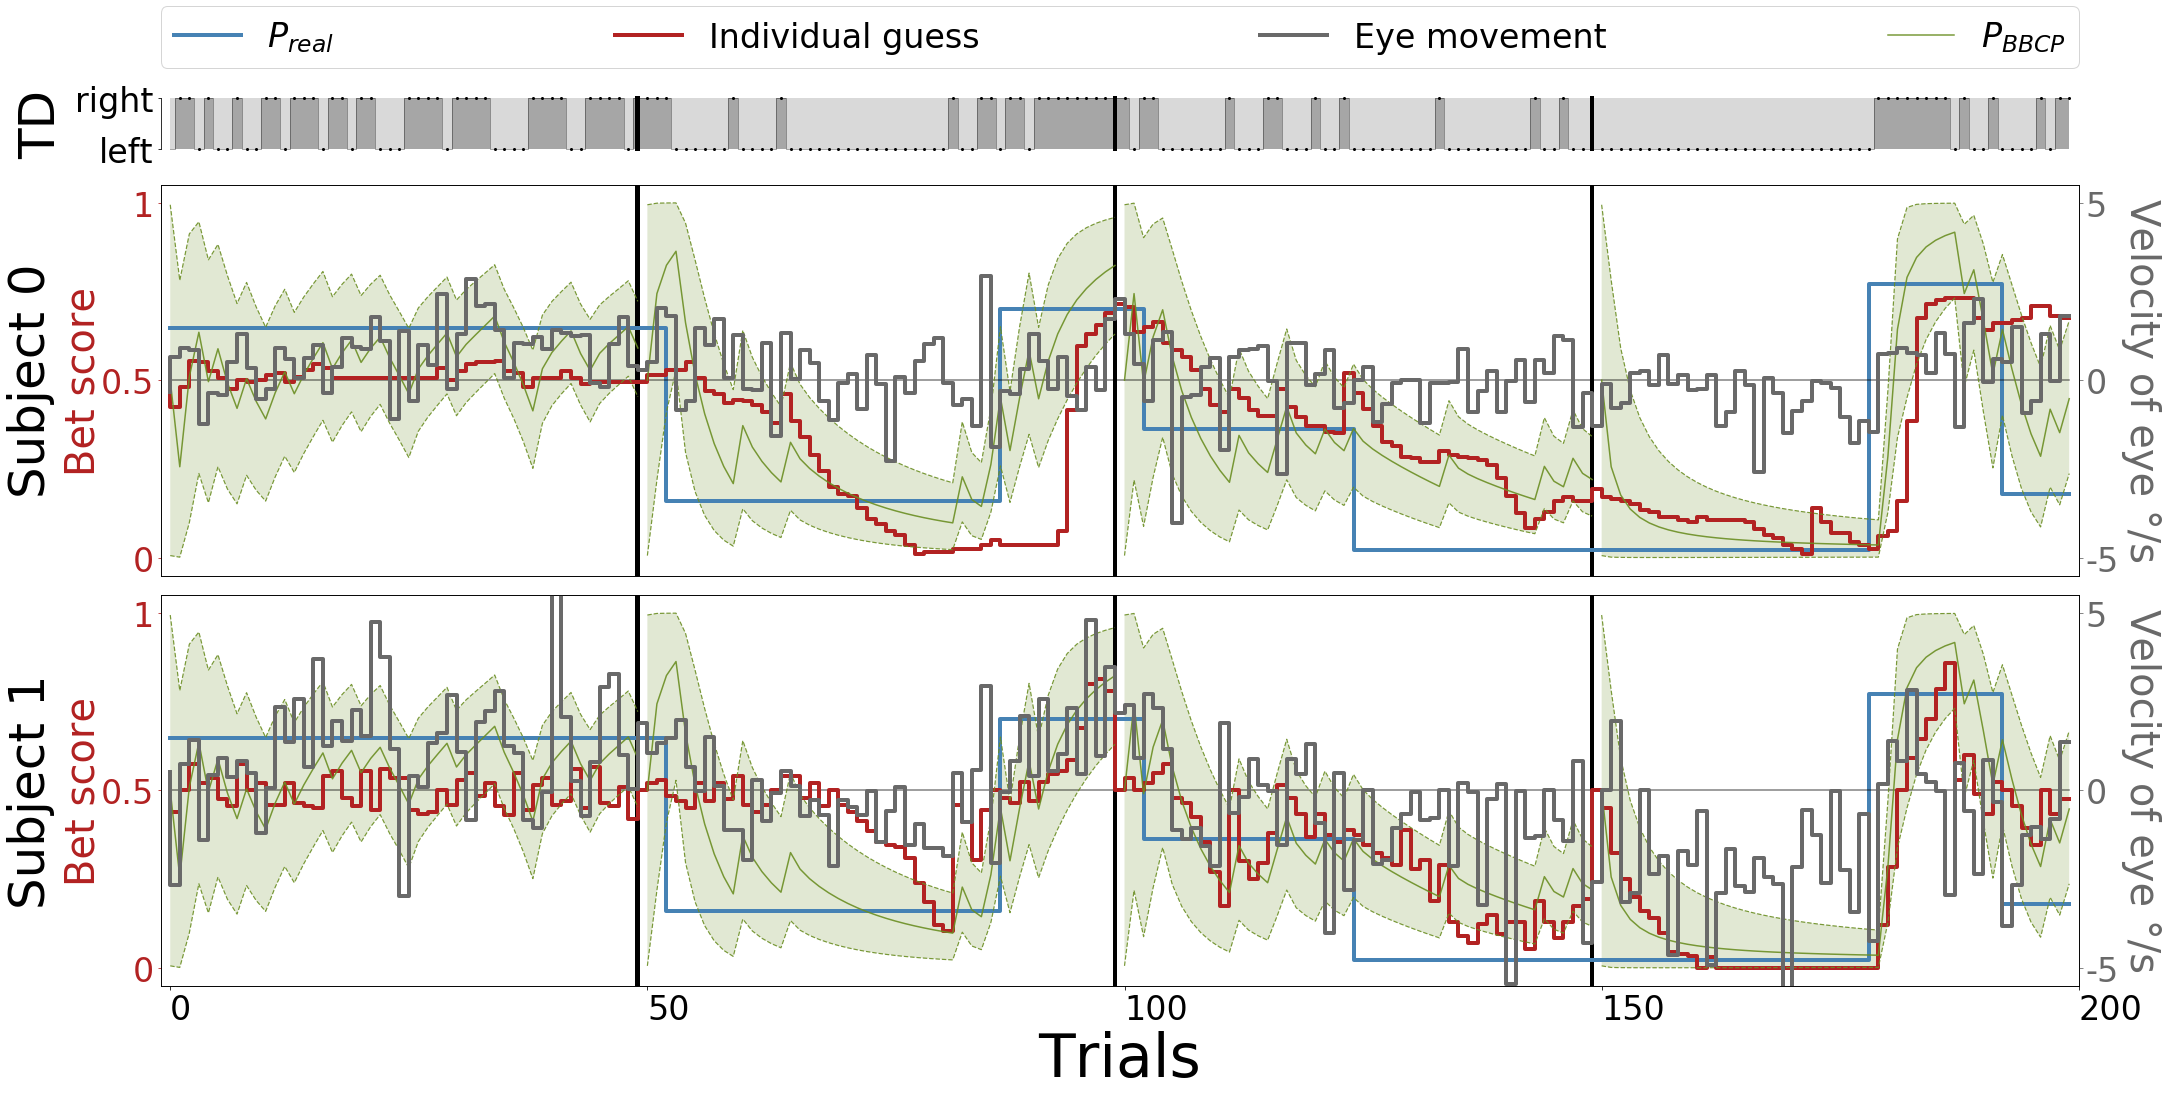

In [11]:
fig, axs = e.plot_experiment(mode='deux', mode_bcp='mean', color_bcp=color_bcp_mean, print_suj=True, **opt)
for ext in exts: fig.savefig('{msfigpath}/{figname}'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)